<a href="https://colab.research.google.com/github/Shreeyamshu/Ai/blob/main/Week2workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv
Saving medical_students_dataset.csv to medical_students_dataset.csv
Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


## 3.1 Problem 1 –  Solution

In [3]:
import pandas as pd
df = pd.read_csv('bank.csv')
df.info()
object_columns = df.select_dtypes(include='object').columns
object_columns

for col in object_columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())

df.isnull().sum()

df_numeric = df.drop(columns=object_columns)
df_numeric.to_csv('banknumericdata.csv', index=False)
df_numeric.head()

df_num = pd.read_csv('banknumericdata.csv')
df_num.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Unique values in job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**3.1 - Problem 2**

In [4]:
import pandas as pd

df = pd.read_csv("medical_students_dataset.csv")

df.info()
df.isnull().sum()

# Example imputations (adjust based on actual columns)
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

df = df.drop_duplicates()

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 187275 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dt

,0
Student ID,19836
Age,0
Gender,0
Height,19844
Weight,19843
Blood Type,0
BMI,19826
Temperature,19837
Heart Rate,19848
Blood Pressure,19844


## 3.2 –  Solution

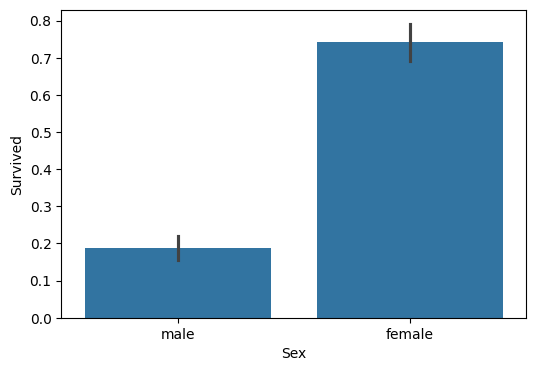

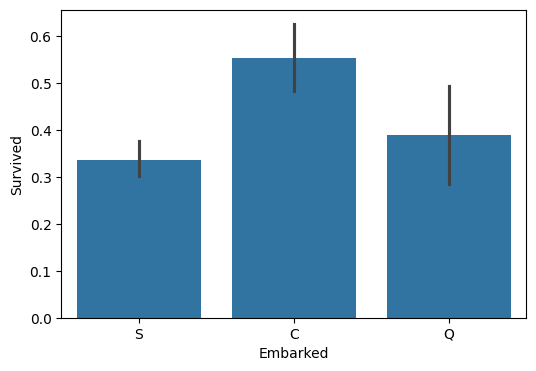

In [5]:
df = pd.read_csv('Titanic-Dataset.csv')
subset = df[['Name','Pclass','Sex','Age','Fare','Survived']]
first_class = subset[subset['Pclass']==1]
first_class.describe()

first_class['Age'].isnull().sum()

first_class_clean = first_class.dropna(subset=['Age'])
first_class_clean.head()

emb = pd.get_dummies(df['Embarked'], prefix='Embarked')
df2 = pd.concat([df, emb], axis=1)
df2 = df2.drop(columns=['Embarked'])
df2.head()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.show()